In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

import statsmodels.formula.api as sm

#importing seaborn for statistical plots
import seaborn as sns

import datetime
import time
from time import strftime, gmtime

import statsmodels.formula.api as smf
#maschine learning libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, auc, f1_score

from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.svm import SVC
from random import sample

In [2]:
df_flights=pd.read_csv("flight-delays/flights.csv")
df_flights

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_airlines = pd.read_csv('flight-delays/airlines.csv')
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [4]:
# joining airlines
df_flights = df_flights.merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [5]:
# dropping old column and rename new one
df_flights = df_flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df_flights = df_flights.rename(columns={"AIRLINE_y":"AIRLINE"})

Analyzing the proportion of flights with respect to the companies.

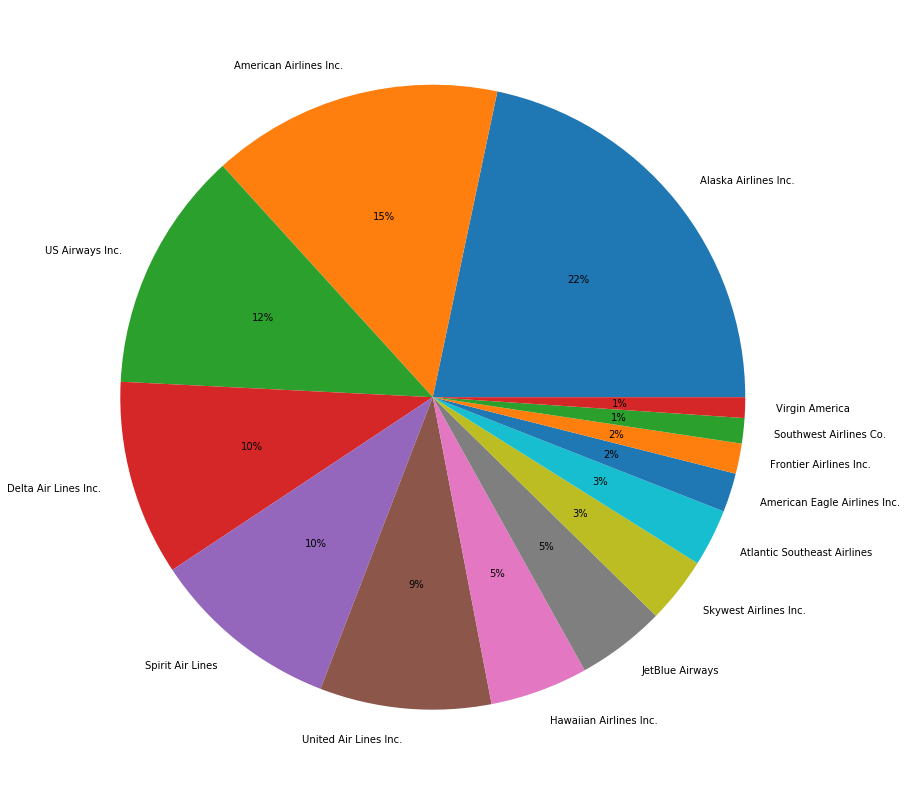

In [6]:
fig_dim = (14,18)
f, ax = plt.subplots(figsize=fig_dim)
quality=df_flights["AIRLINE"].unique()
size=df_flights["AIRLINE"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

Getting an overview of delays by airlines companies.

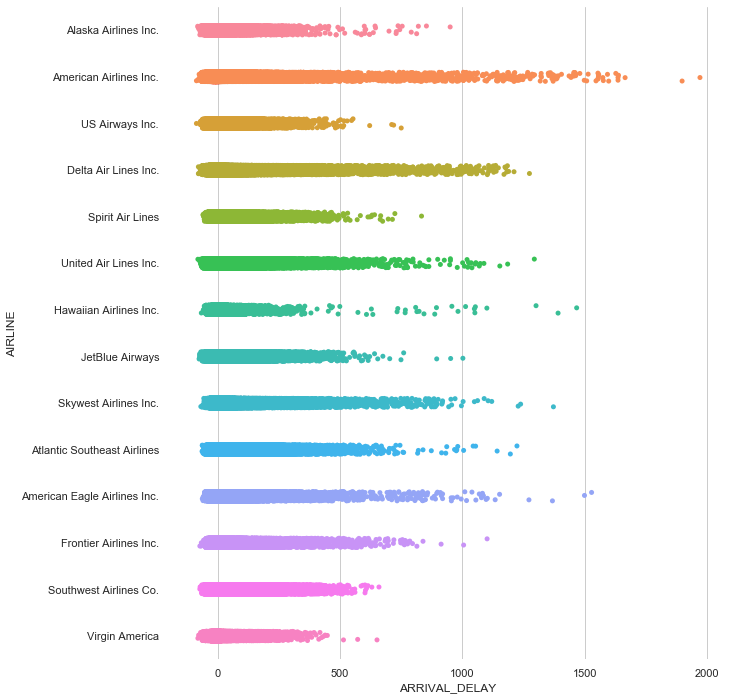

In [7]:
sns.set(style="whitegrid")

# initialize the figure
fig_dim = (10,12)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=df_flights, dodge=True, jitter=True
            )
plt.show()

The distribution above shows the airlines in comparison to their ARRIVAL_DELAYs. It clearly shows that American Airlines has a wide spread of delays. By contrast, the airline with the most entries is Southwest Airlines and their delays look pretty low compared to the American Airlines delays.

In [8]:
# Group by airline and sum up / count the values
df_flights_grouped_sum = df_flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('sum').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_SUM"})
df_flights_grouped_cnt = df_flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('count').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_CNT"})

# Merge the two groups together
df_flights_grouped_delay = df_flights_grouped_sum.merge(df_flights_grouped_cnt, left_on='AIRLINE', right_on='AIRLINE', how='inner')
# Calculate the average delay per airline
df_flights_grouped_delay.loc[:,'AVG_DELAY_AIRLINE'] = df_flights_grouped_delay['ARRIVAL_DELAY_SUM'] / df_flights_grouped_delay['ARRIVAL_DELAY_CNT']

df_flights_grouped_delay.sort_values('ARRIVAL_DELAY_SUM', ascending=False)

,AIRLINE,ARRIVAL_DELAY_SUM,ARRIVAL_DELAY_CNT,AVG_DELAY_AIRLINE
9,Southwest Airlines Co.,5435468.0,1242403,4.374964
3,Atlantic Southeast Airlines,3653252.0,554752,6.585379
8,Skywest Airlines Inc.,3371854.0,576814,5.845652
12,United Air Lines Inc.,2757957.0,507762,5.431594
1,American Airlines Inc.,2460604.0,712935,3.451372
2,American Eagle Airlines Inc.,1800397.0,278791,6.457873
7,JetBlue Airways,1749880.0,262042,6.677861
10,Spirit Air Lines,1667050.0,115193,14.471800
5,Frontier Airlines Inc.,1126549.0,90090,12.504706
11,US Airways Inc.,719831.0,194223,3.706209


I am dividing the different correlations into two parts, the positive correlations (higher than 0.6 ) and the less positive correlations (less than 0.6 but higher than 0.2).

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


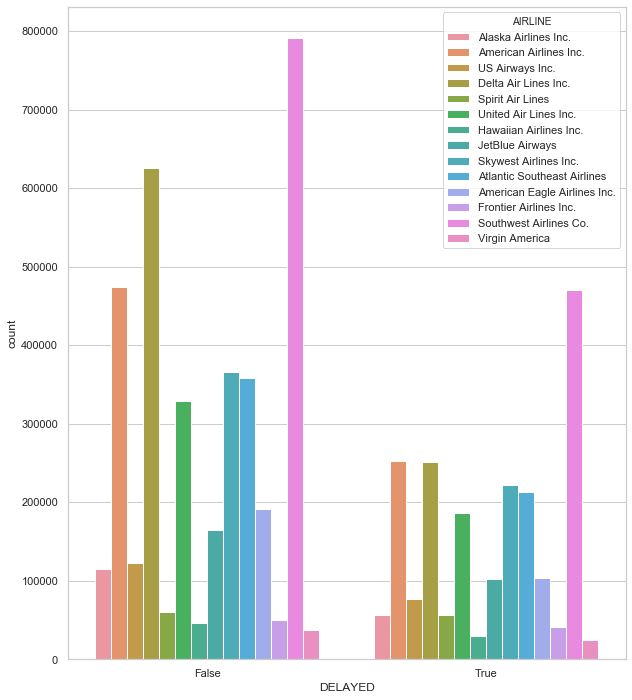

In [9]:
# Marking the delayed flights
df_flights['DELAYED'] = df_flights.loc[:,'ARRIVAL_DELAY'].values > 0

figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue='AIRLINE',data=df_flights)
plt.show()

In [10]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELA

In [11]:
df_flights['OUTPUT_LABEL'] = (df_flights.DEPARTURE_DELAY >= 0).astype(int)
df_flights['OUTPUT_LABEL'].value_counts()

0    3364101
1    2454978
Name: OUTPUT_LABEL, dtype: int64

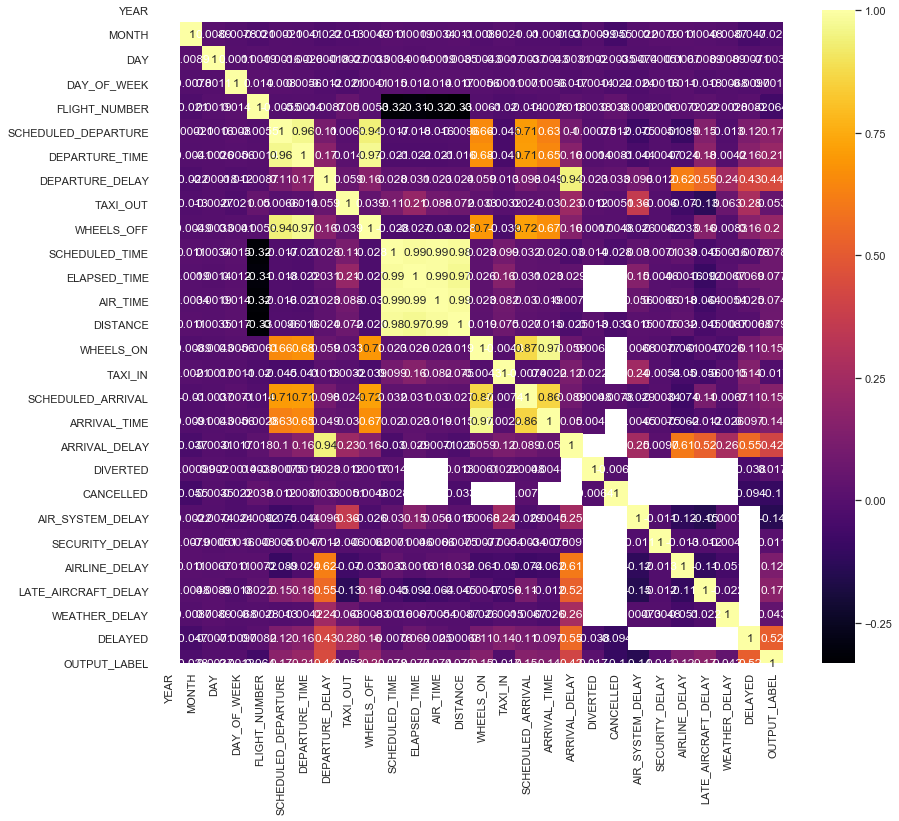

In [12]:
# Dataframe correlation
del_corr = df_flights.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

TAXI_IN, TAXI_OUT, WHEELS_ON, WHEELS_OFF: These are numerical values but will not contribute in any way to the delay prediction, so these will not be included in the model.

MONTH, FLIGHT NUMBER: These are some numerical variables that will not be useful in the prediction and hence we will not use them in building our model.

DIVERTED: This is another numerical variable which will have no effect on the departure delays and hence we will not include it in our model

ORIGIN_AIRPORT, DESTINATION_AIRPORT: These are the most important categorical variables because they will play a major role in the delays. They have many categorical variables under them and will help in building a good predictive model.

DAY_OF_WEEK: Day of the week is a numerical value and plays an important role and will be used in building the models.


In [13]:
df_flights = df_flights.drop(['TAXI_IN', 'TAXI_OUT', 'WHEELS_ON', 'WHEELS_OFF', 'MONTH', 'FLIGHT_NUMBER', 'DIVERTED', 'TAIL_NUMBER', 'DEPARTURE_DELAY',
                              'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAYED'], axis=1)

In [14]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 17 columns):
YEAR                   int64
DAY                    int64
DAY_OF_WEEK            int64
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
CANCELLED              int64
CANCELLATION_REASON    object
AIRLINE                object
OUTPUT_LABEL           int64
dtypes: float64(5), int64(8), object(4)
memory usage: 799.1+ MB


In [15]:
df_flights = df_flights.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1)

In [16]:
# -------------------------------------
# converting categoric value to numeric
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4

# -----------------------------------
# converting NaN data to numeric zero
df_flights['CANCELLATION_REASON'] = df_flights['CANCELLATION_REASON'].fillna(0)

In [17]:
# drop the last 1% of missing data rows.
df_flights = df_flights.dropna(axis=0)

# choosing the predictors
feature_list = [
    'YEAR'
    ,'MONTH'
    ,'DAY'
    ,'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME'
    ,'DEPARTURE_DELAY'
    ,'SCHEDULED_TIME'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'DAY_OF_WEEK'
    ,'SECURITY_DELAY'
]



In [18]:
df_flights_1=df_flights.sample(n=50000)
X = df_flights_1.drop(['OUTPUT_LABEL'], axis=1)
y = df_flights_1.OUTPUT_LABEL

In [19]:
y.value_counts()

0    28644
1    21356
Name: OUTPUT_LABEL, dtype: int64

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
list(X_train.columns)

['YEAR',
 'DAY',
 'DAY_OF_WEEK',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'CANCELLED',
 'CANCELLATION_REASON']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from vecstack import stacking
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

In [23]:
MLA = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()]

In [24]:
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    print(f1_score(y_test, predicted))

0.5932305832577818
0.8028631776578269
0.7622918578733446


In [25]:
S_train, S_test = stacking(MLA,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=f1_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=1)

task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

    ----
    MEAN:     [0.58461202] + [0.01282533]
    FULL:     [0.58452896]

model  1:     [DecisionTreeClassifier]
    ----
    MEAN:     [0.82819722] + [0.05340410]
    FULL:     [0.82807880]

model  2:     [RandomForestClassifier]
    ----
    MEAN:     [0.74698145] + [0.00990458]
    FULL:     [0.74705571]



In [26]:
model = xgboost.XGBClassifier()
predicted = model.fit(S_train, y_train).predict(S_test)
print(f1_score(y_test, predicted))

0.893651529193698


In [49]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)

In [50]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(S_train, y_train)
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  4.0min finished


Best: -0.344076 using {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [51]:
model = xgboost.XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=100)

0.893651529193698
